# RIB 2020 Homework 6

**Note:** This notebook uses SageMath 9.0. If you don't have SageMath installed already you can either install it following instructions [here](https://doc.sagemath.org/html/en/installation/) (`conda` install is available) or you can use [CoCalc](https://cocalc.com/).

## a. Deterministic stable steady states 

The steady state can be obtained by equating $\frac{dx}{dt}$ to 0, i.e.  

$$\frac{v_0 + v_1 K_1 K_2 x^2}{1 + K_1 K_2 x^2} = \gamma x$$

or

$$ K_1 K_2 \gamma x^3 - v_1 K_1 K_2 x^2 + \gamma x - v_0 = 0$$



##### $K_1 K_2 = 10^{-4}$:

We get as solutions $x_1 = 130.9017, x_2 = 50, x_3 = 19.0983$. Thus $x_{low}^{SS} = 19.0983$ and $x_{high}^{SS} = 130.9017$.

##### $K_1 K_2 = 10^{-6}$:

We get as solutions one real root $x_1 = 12.5294$ and two other complex roots, which we can ignore. It remains to find out if this is $x_{low}^{SS}$ or $x_{high}^{SS}$ for this case. 

## b. The approximate form $\mathcal{P}(x)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = var('x')

v_0 = 125 / 10
v_1 = 200
k1k2 = 1 / 10000
gamma = 1

In [3]:
f = (v_0 + v_1 * k1k2 * x ** 2) / (1 + k1k2 * x ** 2)
g = gamma * x

Plot $f - g$ for sanity check:

In [4]:
f_minus_g = f - g

f_minus_g_xs = list(np.arange(0, 200, 0.1))
f_minus_g_ys = []

for f_minus_g_x_val in f_minus_g_xs:
    f_minus_g_y_val = f_minus_g.subs(x = f_minus_g_x_val)
    f_minus_g_ys.append(float(f_minus_g_y_val.n()))

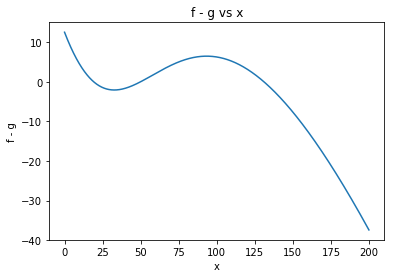

In [5]:
plt.plot(f_minus_g_xs, f_minus_g_ys)
plt.xlabel('x')
plt.ylabel('f - g')
plt.title('f - g vs x')
plt.show()

Find $\phi(x)$:

In [6]:
phi_x = -2 * integral((f - g) / (f + g), x)
# phi_x = 2 * integral((f - g) / (f + g), x)
phi_x

300*sqrt(5)*log((x - 25*sqrt(5) + 75)/(x + 25*sqrt(5) + 75)) + 2*x - 900*log(x^2 + 150*x + 2500) + 1000*log(x + 50)

Plot $\phi(x)$:

In [7]:
phi_x_xs = list(np.arange(0, 200, 0.01))
phi_x_ys = []

for phi_x_val in phi_x_xs:
    phi_x_y_val = phi_x.subs(x = phi_x_val)
    phi_x_ys.append(float(phi_x_y_val.n()))

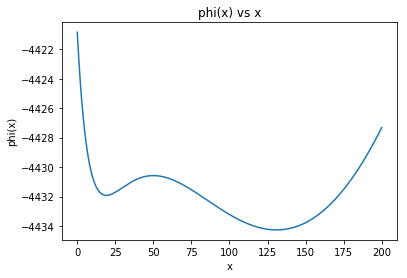

In [8]:
plt.plot(phi_x_xs, phi_x_ys)
plt.xlabel('x')
plt.ylabel('phi(x)')
plt.title('phi(x) vs x')
plt.show()

The y-axis has range in the thousands, which will create issues for our next step of calculating $p(x)$ ($e^{-\phi(x)}$ will become a huge number). So let's shift $\phi$ down:

In [9]:
shifting_const = 4415
shifted_phi_x = phi_x + shifting_const

In [10]:
shifted_phi_xs = list(np.arange(0, 200, 0.01))
shifted_phi_ys = []

for shifted_phi_x_val in shifted_phi_xs:
    shifted_phi_y_val = shifted_phi_x.subs(x = shifted_phi_x_val)
    shifted_phi_ys.append(float(shifted_phi_y_val.n()))

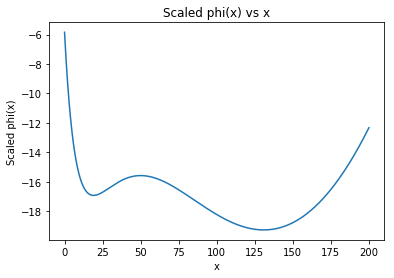

In [11]:
plt.plot(shifted_phi_xs, shifted_phi_ys)
plt.xlabel('x')
plt.ylabel('Scaled phi(x)')
plt.title('Scaled phi(x) vs x')
plt.show()

The double well as shown in text is recovered. Now we need to find the value of the normalizing constant w.r.t. this shift ($A$ as given in the notes).

First plot of $\frac{e^{-\Phi(n)}}{f + g} = \frac{p(x)}{A}$ at different values of $x$:

In [12]:
p_x_by_A = e^(-shifted_phi_x) / (f + g)

In [13]:
p_x_by_A_xs = list(np.arange(0, 300, 0.1))
p_x_by_A_ys = []

for p_x_by_A_x in p_x_by_A_xs:
    p_x_by_A_y = p_x_by_A.subs(x = p_x_by_A_x)
    p_x_by_A_ys.append(float(p_x_by_A_y.n()))

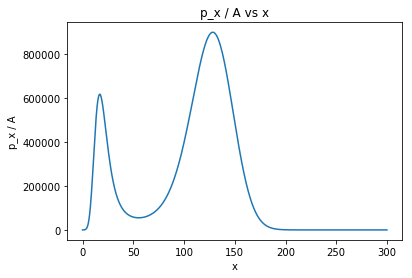

In [14]:
plt.plot(p_x_by_A_xs, p_x_by_A_ys)
plt.xlabel('x')
plt.ylabel('p_x / A')
plt.title('p_x / A vs x')
plt.show()

It seems the integral will converge. So we can try finding the normalizing factor. 

Using the built in integral() was taking too long, so let's approximate using [Monte Carlo Integral](https://doc.sagemath.org/html/en/reference/calculus/sage/calculus/integration.html).

In [15]:
area, error = monte_carlo_integral(p_x_by_A, [0], [400], 1000000)

In [16]:
A = 1 / area

In [17]:
p_x = p_x_by_A * A

In [18]:
p_x_xs = list(np.arange(0, 300, 0.1))
p_x_ys = []

for p_x_x in p_x_xs:
    p_x_y = p_x.subs(x = p_x_x)
    p_x_ys.append(float(p_x_y.n()))

In [19]:
x_ss_low = 19.0983
x_ss_high = 130.9017

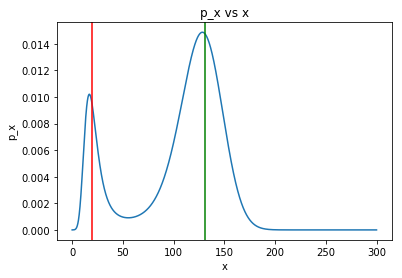

In [20]:
plt.plot(p_x_xs, p_x_ys)
plt.xlabel('x')
plt.ylabel('p_x')
plt.title('p_x vs x')

# plot the steady states as obtained in section (a)
plt.axvline(x = x_ss_low, color = 'r')
plt.axvline(x = x_ss_high, color = 'g')

plt.show()

Red line represents $x_{low}^{SS}$ and green line represents $x_{high}^{SS}$ as obtained in part (a). They corroborate with $\mathcal{P}(x)$.

## c. Langevin Description

The Langevin description

$$ \frac{d}{dt}x = A + \sqrt{B}\ \eta(t) $$

can be rewritten as below with the caveat that you have to worry about the $\Delta t$'s:

$$x(t + \Delta t) = x(t) + A \Delta t + \sqrt{B \Delta t} S$$ where  
$A = f - g$  
$B = f + g$  
and $S$ is distributed as $N(0, 1)$.  

Let's code this up:

In [21]:
def langevin(x_start, f, g, tau, dt):
    
    """
    
    Parameters:
    -----------
    
    x_start: positive real number; initial starting position of the system
    f: Sage evaluatable expression; this is the rate of creation
    g: Sage evaluatable expression; this is the rate of destruction
    tau: positive real number; amount of time to make the updates for
    dt: (small) positive real number; time step (dt << tau then)    
    
    Returns:
    --------
    A single number x, which is the state at which the system is after seeing no_events number of events
    """
    
    A_term = f - g
    B_term = f + g

    current_x = x_ss_low

    langevin_x_arr = []
    langevin_time_arr = np.arange(0, tau, dt)
    
    langevin_x_arr_means = []

    for time in langevin_time_arr:

        # evaluate A and B terms
        A_term_val = float(A_term.subs(x = current_x).n())
        B_term_val = float(B_term.subs(x = current_x).n())

        current_x += A_term_val * dt + sqrt(B_term_val * dt) * np.random.normal()
        
        langevin_x_arr.append(current_x)
        langevin_x_arr_means.append(np.mean(langevin_x_arr[-50:]))
        
    return langevin_x_arr_means


Let's plot the output of one replicate of Langevin updates:

In [22]:
dt = 1 # dt has to be chosen methodologically as Mukund mentioned in class, but now let's go with trial and error
tau = 5500

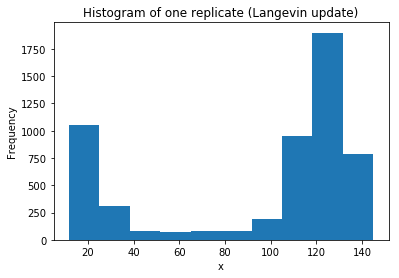

In [23]:
plt.hist(langevin(x_ss_low, f, g, tau, dt))
plt.title('Histogram of one replicate (Langevin update)')
plt.xlabel('x')
plt.ylabel('Frequency')
plt.show()

Looks close enough to what we expect - we can see the double well forming already (in some replicates). Let's do a 100 replicates (that itself takes time, that's why we're not going for a 1000 replicates. But it's enough to show corroboration with $\mathcal{P}(x)$):

In [24]:
no_replicates_langevin = 100

replicate_means_langevin = []

# TODO: make this more (space) efficient

for replicate in range(1, no_replicates_langevin + 1):
    if replicate % 10 == 0:
        print(replicate, 'replicates done...')
    replicate_means = langevin(x_ss_low, f, g, tau, dt)
    replicate_means_langevin += replicate_means

10 replicates done...
20 replicates done...
30 replicates done...
40 replicates done...
50 replicates done...
60 replicates done...
70 replicates done...
80 replicates done...
90 replicates done...
100 replicates done...


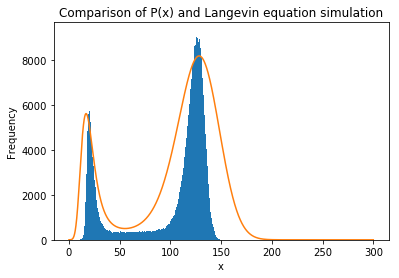

In [25]:
langevin_obs_count = len(replicate_means_langevin)

plt.hist(replicate_means_langevin, bins = 300)
plt.plot(p_x_xs, [langevin_obs_count * p_x_y for p_x_y in p_x_ys])
plt.title('Comparison of P(x) and Langevin equation simulation')
plt.xlabel('x')
plt.ylabel('Frequency')
plt.show()

Thus, the outputs of theoretical calculation and Langevin stochastic simulation seem to corroborate well. Getting more replicates will close the gap between both.

## d. Gillespie Simulation

Let's plot the outcome of one replicate to get a feel for the process:

In [26]:
import random
random.seed(1) # for reproducibility

In [27]:
def f_inverse(y, alpha):
    
    """
    Returns f inverse where f is the cdf of an exponentially distributed function with parameter alpha (i.e. p(x) = alpha * exp(-alpha * x))
    
    Parameters:
    -----------
    y: A real number between 0 and 1 (since f is a cdf and its value lies between 0 and 1)
    alpha: A (positive?) real number, which is the parameter of the exponentially distributed function
    
    Returns:
    --------
    
    A real number which is f inverse of y
    """
    
    return (1 / alpha) * np.log(1 / y)

def gillespie(no_events, f, g, x_start):
    
    """
    Do Gillespie stochastic simulation algorithm (SSA) till you see no_events number of events
    
    Parameters:
    -----------
    
    no_events: positive integer, repeat till these many events are seen
    f: Sage evaluatable expression; this is the rate of creation
    g: Sage evaluatable expression; this is the rate of destruction
    
    Returns:
    --------
    A single number x, which is the state at which the system is after seeing no_events number of events
    """

    current_x = x_start

    time_step = 0
    
    x_means = []
    event_times = []
    x_arr = []

    for event_count in range(1, no_events + 1):
        
        f_val = float(f.subs(x = current_x).n())
        g_val = float(g.subs(x = current_x).n())

        next_create_time_seed = random.random()
        next_create_time = f_inverse(next_create_time_seed, f_val)

        next_destruct_time_seed = random.random()
        next_destruct_time = f_inverse(next_destruct_time_seed, g_val)

        event_time = min(next_create_time, next_destruct_time)
        time_step += event_time
        
        if next_create_time < next_destruct_time:
            # creation event happened
            current_x += 1
        else:
            # destruction happened
            current_x = max(current_x - 1, 0)
            
        x_arr.append(current_x)
        x_means.append(np.mean(x_arr[-50:]))
        event_times.append(time_step)
    
    return x_means

Let's see what the output of one replicate looks like:

In [35]:
no_events = 25000

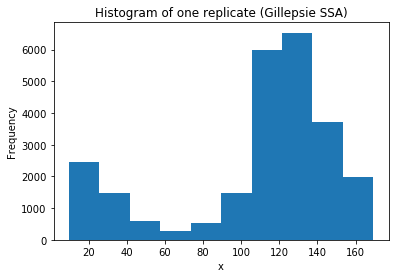

In [36]:
plt.hist(gillespie(no_events, f, g, x_ss_low))
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('Histogram of one replicate (Gillepsie SSA)')
plt.show() 

Again, it seems to recover the form of $\mathcal{P}(x)$ (at least in some replicates). 

The function `gillespie` above outputs the result of one replicate. We have been asked to do a 1000 replicates, but let's limit to 500:

In [30]:
# warning: cell takes a long time to execute

replicate_means_gillespie = []
x_start = x_ss_low

no_replicates_gillespie = 100
no_events = 25000 # number of events to be seen before stopping Gillespie

for replicate in range(1, no_replicates_gillespie + 1):
    if replicate % 5 == 0:
        print(replicate, 'replicates done...')
    replicate_means = gillespie(no_events, f, g, x_start)
    replicate_means_gillespie += replicate_means

5 replicates done...
10 replicates done...
15 replicates done...
20 replicates done...
25 replicates done...
30 replicates done...
35 replicates done...
40 replicates done...
45 replicates done...
50 replicates done...
55 replicates done...
60 replicates done...
65 replicates done...
70 replicates done...
75 replicates done...
80 replicates done...
85 replicates done...
90 replicates done...
95 replicates done...
100 replicates done...


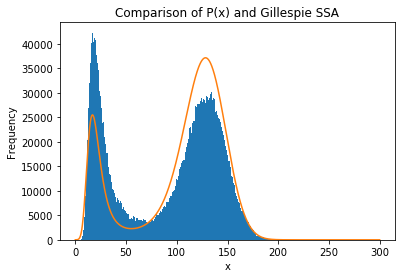

In [31]:
gillespie_obs_count = len(replicate_means_gillespie)

# plot histogram of Gillespie
plt.hist(replicate_means_gillespie, bins = 200)

# plot P(x) as obtained in part (a)
plt.plot(p_x_xs, [gillespie_obs_count * p_x_y for p_x_y in p_x_ys])

plt.title('Comparison of P(x) and Gillespie SSA')
plt.xlabel('x')
plt.ylabel('Frequency')

plt.show()

The histograms represent the output of Gillespie simulation for 100 replicates while the yellow line plots the values expected theoretically. Again, perhaps with more replicates, the offset between the two will become lesser and lesser.

## e. First passage time

Let's write a function to get one replicate of the first passage time:

In [32]:
def get_first_passage_time_langevin(x_start, x_stop, f, g, dt):
    
    """
    Returns the first passage time to go from x_start to x_stop (so this is one replicate)
    
    Parameters:
    -----------
    
    x_start: positive real number; initial starting position of the system
    x_stop: positive real number; ending position of the system
    f: Sage evaluatable expression; this is the rate of creation
    g: Sage evaluatable expression; this is the rate of destruction
    dt: (small) positive real number; time step (dt << tau then)    
    
    Returns:
    --------
    A single number t, which is the amount of time it took to go from x_start to x_stop (first passage time)
    """
    
    A_term = f - g
    B_term = f + g

    current_x = x_ss_low
    
    elapsed_time = 0

    while current_x < x_stop:

        # evaluate A and B terms
        A_term_val = float(A_term.subs(x = current_x).n())
        B_term_val = float(B_term.subs(x = current_x).n())

        current_x += A_term_val * dt + sqrt(B_term_val * dt) * np.random.normal()
        
        elapsed_time += dt
        
    return elapsed_time

Let's do many replicates:

In [37]:
fpt_replicate_count = 100

fp_times = []

for replicate_count in range(fpt_replicate_count):
    elapsed_time = get_first_passage_time_langevin(x_ss_low, x_ss_high, f, g, dt)
    fp_times.append(elapsed_time)

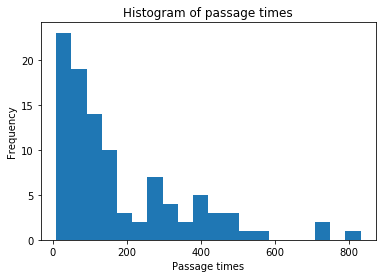

In [42]:
plt.hist(fp_times, bins = 20)
plt.xlabel('Passage times')
plt.ylabel('Frequency')
plt.title('Histogram of passage times')
plt.show()

In [43]:
mean_fpt = np.mean(fp_times)
print('Mean first passage time as per Langevin method =', mean_fpt)

Mean first passage time as per Langevin method = 180.8
